## Project Overview

Heart diseases(HD) are the major cause of death globally. More people die annually from heart diseases than any other cause. Most HDs can be prevented by addressing behavioral risk factors such as usage of alcohol and tobacco, unhealthy diet and obesity.People with HD or who are at high risk need early detection and management using counselling and medicine.

Machine Learning proves to be effective in making predictions and decisions from large set of data produced by healthcare industry. Hence, ML can address the above issues.

Reference: [WHO](https://www.who.int/news-room/fact-sheets/detail/cardiovascular-diseases-(cvds))

## Importing Python Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the data

In [2]:
#Read data from CSV file
df_sourcefile = pd.read_csv('Data\cardio_train.csv')
print(f'Shape of the data set is {df_sourcefile.shape}')

Shape of the data set is (70000, 12)


In [3]:
#Make a copy of original dataset
df_HD = df_sourcefile.copy()

## Data Description and Exploratory Visualisations

> In this section, we will provide data visualizations that summarizes or extracts relevant characteristics of features in our dataset. Let's look at each column in detail, get a better understanding of the dataset, and group them together when appropriate.

### Overview

In [4]:
# Dataset Columns
df_HD.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [5]:
# Dataset header
df_HD.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [6]:
# Coverting Days to Years - Age
df_HD['age'] = (df_HD['age'] / 365).round()

>The dataset contains several numerical columns providing various information on patient's health and lifestyle. Age column is in days instead of years

In [7]:
#Checking for Missing Values
df_HD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  float64
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 6.4 MB


In [8]:
#Checking for Duplicate records
df_HD.duplicated().sum()

3816

In [9]:
#Removing the Duplicate records
df_HD.drop_duplicates(inplace=True)

> The data provided has no missing values, but it does have duplicate rows, which we have removed.

### Features Overview

In [10]:
# Analysing Quantitative Variables
df_HD[['age','height','weight','ap_hi','ap_lo']].describe()

,age,height,weight,ap_hi,ap_lo
count,66184.000000,66184.000000,66184.000000,66184.000000,66184.000000
mean,53.365209,164.345114,74.579057,129.304938,97.607186
std,6.807710,8.353877,14.613279,158.368179,193.782532
min,30.000000,55.000000,10.000000,-150.000000,-70.000000
25%,48.000000,159.000000,65.000000,120.000000,80.000000
50%,54.000000,165.000000,72.000000,120.000000,80.000000
75%,59.000000,170.000000,83.000000,140.000000,90.000000
max,65.000000,250.000000,200.000000,16020.000000,11000.000000


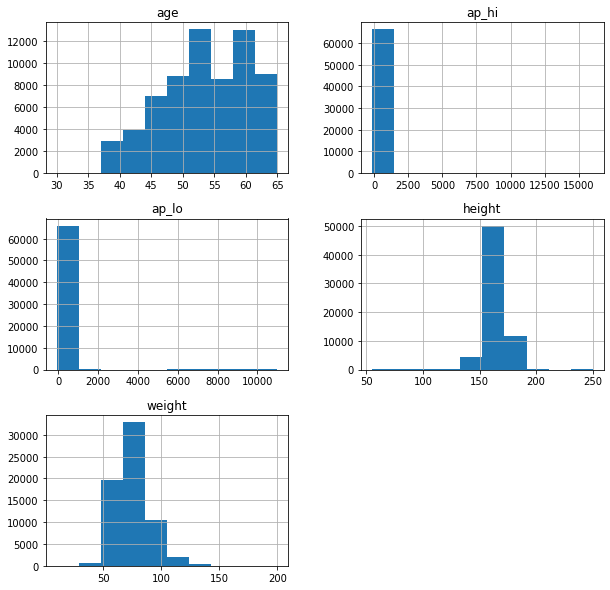

In [11]:
df_HD[['age','height','weight','ap_hi','ap_lo']].hist(figsize=(10,10))
plt.show()

>Taking a look at the histograms above, We can see that each feature has a different range of distribution. Thus, using scaling before our predictions should be of great use.

### Target Variable: Cardio

> The feature 'cardio' is what this Machine Learning problem is about. We are trying to predict the value of the feature 'cardio' by using other related features associated with the patients's health and lifestyle history.

In [12]:
df_HD['cardio'].value_counts()

1    33993
0    32191
Name: cardio, dtype: int64

In [13]:
print("Percentage of patient with Heart disease is {:.1f}% and without Heart disease is: {:.1f}%".format(
    df_HD[df_HD['cardio'] == 1].shape[0] / df_HD.shape[0]*100,
    df_HD[df_HD['cardio'] == 0].shape[0] / df_HD.shape[0]*100))

Percentage of patient with Heart disease is 51.4% and without Heart disease is: 48.6%


### Correlation

>Let's take look at most significant correlations. Correlation coefficients only measure linear correlation.  

In [14]:
# Finding the correlation between cardio and other attributes
correlations = df_HD.corr()['cardio'].sort_values()
print('Most positive Correlations:\n',correlations.tail())
print('\n\nMost negative Correlations:\n',correlations.head())

Most positive Correlations:
 gluc           0.080470
weight         0.174474
cholesterol    0.213036
age            0.234270
cardio         1.000000
Name: cardio, dtype: float64


Most negative Correlations:
 active   -0.027137
smoke    -0.023715
alco     -0.014259
height   -0.009298
gender    0.001365
Name: cardio, dtype: float64


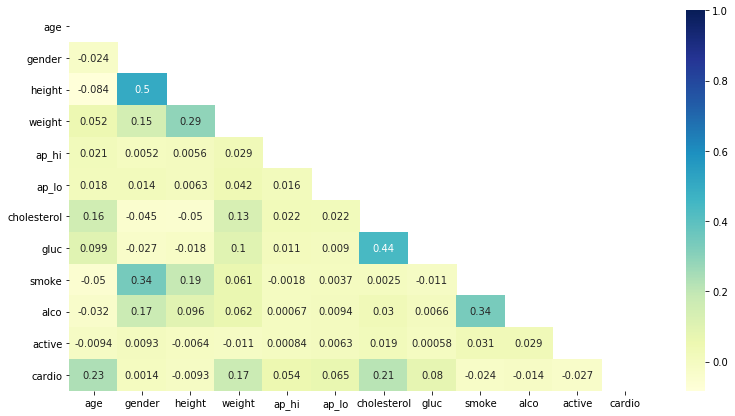

In [15]:
# Calculating Correlation and ploting Heatmap
corr = df_HD.corr()
mask = np.triu(corr)
plt.figure(figsize=(13,7))
sns.heatmap(corr, annot = True, mask=mask,cmap='YlGnBu')

>As shown above, 'age', 'weight', cholesterol' are positively correlated to cardio, while 'active','smoke','alco' are negatively correlated with cardio

### EDA Concluding Remarks

Let's summarise the findings from this EDA: <br>

> - The dataset does not feature any missing or erroneous data values, and all features are of the correct data type. But it has some duplicate data. <br>
- The strongest positive correlations with the target features are: **age**, **weight**,and **cholesterol** 
- The strongest negative correlations with the target features are: **active**, **smoke**, and **alco**
- The dataset is **balanced** with the almost equal number of samples from positive and negative class. <br>



## Pre-processing

In this section, we undertake data pre-processing steps to prepare the datasets for Machine Learning algorithm implementation.

>Machine Learning algorithms can typically only have numerical values as their predictor variables. Hence Label Encoding becomes necessary as they encode categorical labels with numerical values. In this dataset, all catergorial labels are already given as numerical values. 

### Feature Scaling

> Feature Scaling using MinMaxScaler essentially shrinks the range such that the range is now between 0 and n. Machine Learning algorithms perform better when input numerical variables fall within a similar scale. In this case, we are scaling between 0 and 5.

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,5))
HD_col = list(df_HD.columns)
HD_col.remove('cardio')
for col in HD_col:
    df_HD[col] = scaler.fit_transform(df_HD[[col]])
df_HD.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,2.857143,5.0,2.897436,1.368421,0.080396,0.067751,0.0,0.0,0.0,0.0,5.0,0
1,3.571429,0.0,2.589744,1.973684,0.089672,0.072267,5.0,0.0,0.0,0.0,5.0,1
2,3.142857,0.0,2.820513,1.421053,0.086580,0.063234,5.0,0.0,0.0,0.0,0.0,1
3,2.571429,5.0,2.923077,1.894737,0.092764,0.076784,0.0,0.0,0.0,0.0,5.0,1
4,2.571429,0.0,2.589744,1.210526,0.077304,0.058717,0.0,0.0,0.0,0.0,0.0,0


### Splitting data into training and testing sets

> Prior to implementating or applying any Machine Learning algorithms, we must decouple training and testing datasets from our master dataframe.

In [17]:
# Importing sklearn module to split the data
from sklearn.model_selection import train_test_split

In [18]:
# Assign a target column to a new pandas series
target = df_HD['cardio'].copy()
df_HD.drop(['cardio'],axis=1,inplace=True)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(df_HD,target,test_size=0.25,random_state=1)
print("Shape of X_train dataset: ", X_train.shape)
print("Shape of y_train dataset: ", y_train.shape)
print("Shape of X_test dataset: ", X_test.shape)
print("Shape of y_test dataset: ", y_test.shape)

Shape of X_train dataset:  (49638, 11)
Shape of y_train dataset:  (49638,)
Shape of X_test dataset:  (16546, 11)
Shape of y_test dataset:  (16546,)


## Building Machine Learning Models

>The algorithms considered in this section are: **Logistic Regression**, **Random Forest**, **SVM**, **KNN**, **Decision Tree Classifier**, **Gaussian NB**.

In [20]:
# Libraries for data modelling
#from sklearn import svm, tree, linear_model, neighbors
#from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
#from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


# sklearn modules for ML model selection
from sklearn.model_selection import GridSearchCV
#from sklearn.model_selection import RandomizedSearchCV
#from sklearn.model_selection import ShuffleSplit
#from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn import model_selection
from sklearn import metrics

In [21]:
# selection of algorithms to consider and set performance measure
models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear',
                                                         class_weight='balanced')))
models.append(('Random Forest', RandomForestClassifier(
    n_estimators=100)))
models.append(('SVM', SVC(gamma='auto')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decision Tree Classifier',
               DecisionTreeClassifier()))
models.append(('Gaussian NB', GaussianNB()))

> Let's evaluate each model in turn and provide accuracy and standard deviation scores

In [22]:
acc_results = []
auc_results = []
names = []
# set table to table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 
       'Accuracy Mean', 'Accuracy STD']
df_results = pd.DataFrame(columns=col)
i = 0
# evaluate each model using cross-validation
for name, model in models:
#    kfold = model_selection.KFold(
#        n_splits=10, random_state=7)  # 10-fold cross-validation

    cv_acc_results = model_selection.cross_val_score(  # accuracy scoring
        model, X_train, y_train, cv=10, scoring='accuracy')

    cv_auc_results = model_selection.cross_val_score(  # roc_auc scoring
        model, X_train, y_train, cv=10, scoring='roc_auc')

    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    df_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1
df_results.sort_values(by=['ROC AUC Mean'], ascending=False)

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
1,Random Forest,74.76,0.71,69.27,0.63
0,Logistic Regression,72.18,0.64,65.95,0.60
2,SVM,69.37,0.53,63.90,0.56
5,Gaussian NB,68.57,1.38,58.83,0.64
3,KNN,63.66,0.45,60.47,0.62
4,Decision Tree Classifier,61.80,0.76,61.89,0.75


> **Classification Accuracy** is the number of correct predictions made as a ratio of all predictions made. <br> 
It is the most common evaluation metric for classification problems. However, it is often **misused** as it is only really suitable when there are an **equal number of observations in each class** and all predictions and prediction errors are equally important. Let us also consider another evaluation metric AUC.

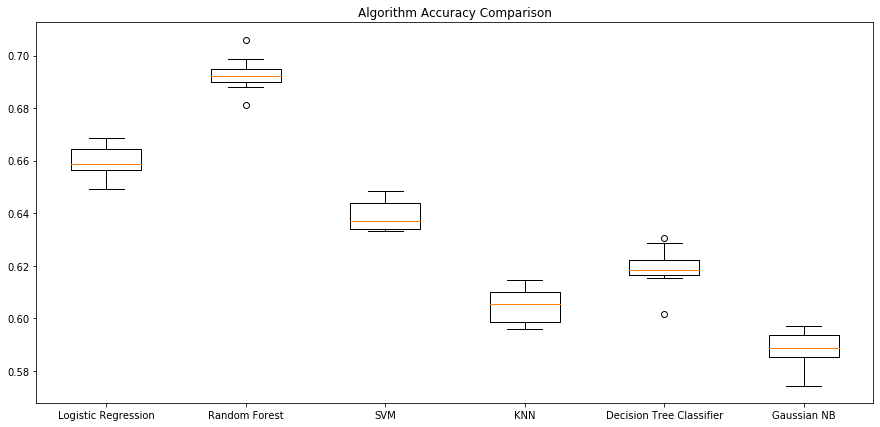

In [23]:
plt.figure(figsize=(15,7))
plt.boxplot(acc_results)
plt.title('Algorithm Accuracy Comparison')
plt.xticks(range(1,len(names)+1),names)
plt.show()

> **Area under ROC Curve** (or AUC for short) is a performance metric for binary classification problems. <br>
The AUC represents a **model’s ability to discriminate between positive and negative classes**. An area of 1.0 represents a model that made all predictions perfectly. An area of 0.5 represents a model as good as random.

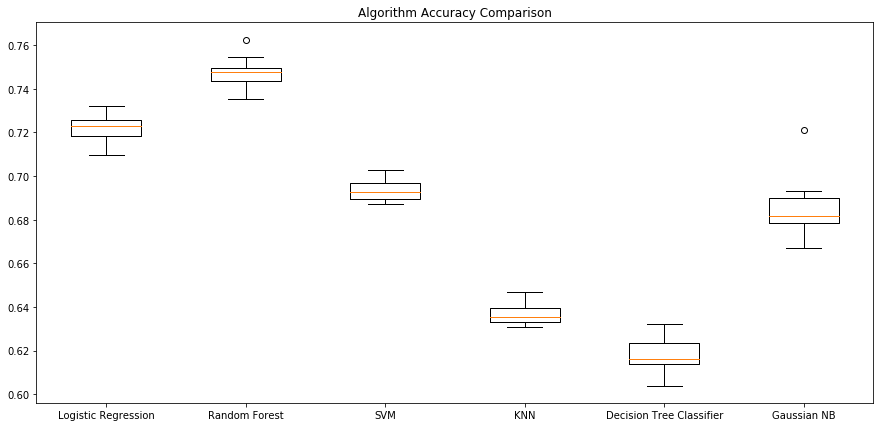

In [24]:
plt.figure(figsize=(15,7))
plt.boxplot(auc_results)
plt.title('Algorithm Accuracy Comparison')
plt.xticks(range(1,len(names)+1),names)
plt.show()

> Based on our ROC AUC comparison analysis, **Logistic Regression** and **Random Forest** show the highest mean AUC scores. We will shortlist these two algorithms for further analysis.

### Logistic Regression

> Let's take a closer look at using the Logistic Regression algorithm. I'll be using 10 fold Cross-Validation to train our Logistic Regression Model and estimate its AUC score.

#### Fine-tuning

> GridSearchCV allows use to fine-tune hyper-parameters by searching over specified parameter values for an estimator.

In [25]:
param_grid = {'C': np.arange(1e-03, 2, 0.01)} # hyper-parameter list to fine-tune
log_gs = GridSearchCV(LogisticRegression(solver='liblinear', # setting GridSearchCV
                                         class_weight="balanced", 
                                         random_state=7),
                      param_grid=param_grid,
                      scoring='roc_auc',
                      cv=10,
                      n_jobs=2,
                      verbose=1)

log_gs.fit(X_train, y_train)
log_opt = log_gs.best_estimator_
results = log_gs.cv_results_

print('='*20)
print("best estimator: " + str(log_gs.best_estimator_))
print("best params: " + str(log_gs.best_params_))
print('best score:', log_gs.best_score_)
print('='*20)

Fitting 10 folds for each of 200 candidates, totalling 2000 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    8.8s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   32.7s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  1.4min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:  3.0min
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:  5.0min
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:  7.7min
[Parallel(n_jobs=2)]: Done 2000 out of 2000 | elapsed:  8.7min finished


best estimator: LogisticRegression(C=1.9909999999999997, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=7, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
best params: {'C': 1.9909999999999997}
best score: 0.7349992273968352


> As shown above, the results from GridSearchCV provided us with fine-tuned hyper-parameter using ROC_AUC as the scoring metric.

#### Evaluation

Text(0.5, 15.0, 'Predicted label')

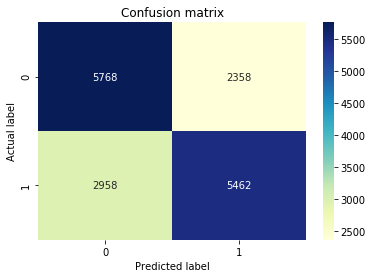

In [26]:
## Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, log_opt.predict(X_test))
class_names=[0,1] # name  of classes
plt.xticks(range(len(class_names)), class_names)
plt.yticks(range(len(class_names)), class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [27]:
Acc_log = log_opt.score(X_test, y_test)*100
print(f'Accuracy of RandomForest Regression Classifier on test set: {Acc_log:.2f}')

Accuracy of RandomForest Regression Classifier on test set: 67.87


> The Confusion matrix is telling us that we have 5768+5462 correct predictions and 2358+2958 incorrect predictions. In other words, an accurac of 67.87%.

In [28]:
# Classification report for the optimised Log Regression
log_opt.fit(X_train, y_train)
print(metrics.classification_report(y_test, log_opt.predict(X_test)))

              precision    recall  f1-score   support

           0       0.66      0.71      0.68      8126
           1       0.70      0.65      0.67      8420

    accuracy                           0.68     16546
   macro avg       0.68      0.68      0.68     16546
weighted avg       0.68      0.68      0.68     16546



In [29]:
log_opt.fit(X_train, y_train) # fit optimised model to the training data
probs = log_opt.predict_proba(X_test) # predict probabilities
probs = probs[:, 1] # we will only keep probabilities associated with the patient with heart disease
logit_roc_auc = metrics.roc_auc_score(y_test, probs) # calculate AUC score using test dataset
print('AUC score: %.3f' % logit_roc_auc)

AUC score: 0.741


### Random Forest Classifier

> Let's take a closer look at using the Random Forest algorithm. I'll fine-tune the Random Forest algorithm's hyper-parameters by cross-validation against the AUC score.

In [30]:
rf_classifier = RandomForestClassifier(class_weight = "balanced",
                                       random_state=7)
param_grid = {'n_estimators': [50, 75, 100, 125, 150, 175],
              'min_samples_split':[2,4,6,8,10],
              'min_samples_leaf': [1, 2, 3, 4],
              'max_depth': [5, 10, 15, 20, 25]}

grid_obj = GridSearchCV(rf_classifier,
                        param_grid=param_grid,
                        scoring='roc_auc',
                        cv=10,
                        verbose=1,
                        n_jobs=2)

grid_obj.fit(X_train, y_train)
rf_opt = grid_obj.best_estimator_

print('='*20)
print("best params: " + str(grid_obj.best_estimator_))
print("best params: " + str(grid_obj.best_params_))
print('best score:', grid_obj.best_score_)
print('='*20)

Fitting 10 folds for each of 600 candidates, totalling 6000 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   52.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:  3.9min
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  9.1min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed: 16.6min
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed: 26.2min
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed: 43.2min
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed: 65.5min
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed: 106.3min
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed: 147.5min
[Parallel(n_jobs=2)]: Done 4996 tasks      | elapsed: 196.9min
[Parallel(n_jobs=2)]: Done 6000 out of 6000 | elapsed: 250.5min finished


best params: RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=175,
                       n_jobs=None, oob_score=False, random_state=7, verbose=0,
                       warm_start=False)
best params: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 175}
best score: 0.7986837218452771


> Random Forest allows us to know which features are of the most importance in predicting the target feature ("cardio" in this project). Below, we plot features by their importance.

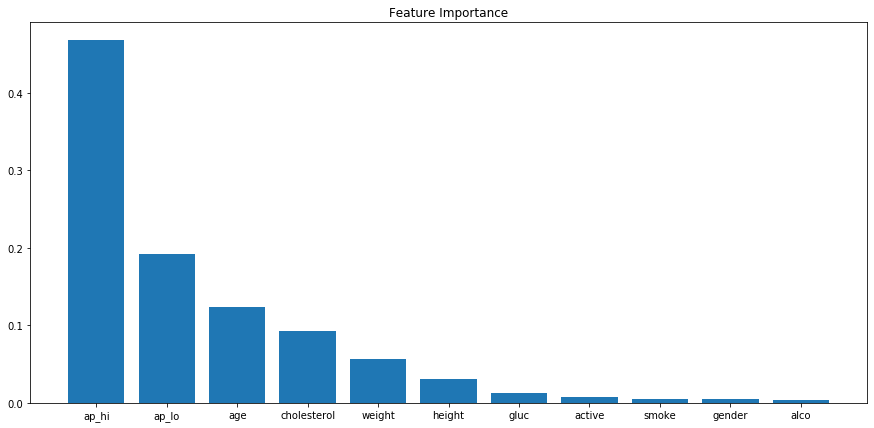

In [31]:
importances = rf_opt.feature_importances_
indices = np.argsort(importances)[::-1]  # Sort feature importances in descending order
names = [X_train.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances
plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X_train.shape[1]), importances[indices]) # Add bars
plt.xticks(range(X_train.shape[1]), names) # Add feature names as x-axis labels
plt.show() # Show plot

In [32]:
importances = rf_opt.feature_importances_
df_param_coeff = pd.DataFrame(columns=['Feature', 'Coefficient'])
for i in range(11):
    feat = X_train.columns[i]
    coeff = importances[i]
    df_param_coeff.loc[i] = (feat, coeff)
df_param_coeff.sort_values(by='Coefficient', ascending=False, inplace=True)
df_param_coeff = df_param_coeff.reset_index(drop=True)
df_param_coeff.head(11)

,Feature,Coefficient
0,ap_hi,0.467806
1,ap_lo,0.192496
2,age,0.123944
3,cholesterol,0.092494
4,weight,0.056907
5,height,0.030591
6,gluc,0.013412
7,active,0.007887
8,smoke,0.005248
9,gender,0.005135


#### Evaluation

Text(0.5, 15.0, 'Predicted label')

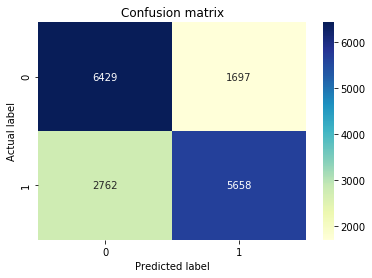

In [33]:
## Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, rf_opt.predict(X_test))
class_names=[0,1] # name  of classes
plt.xticks(range(len(class_names)), class_names)
plt.yticks(range(len(class_names)), class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [34]:
Acc_rf = rf_opt.score(X_test, y_test)*100
print(f'Accuracy of RandomForest Regression Classifier on test set: {Acc_rf:.2f}')

Accuracy of RandomForest Regression Classifier on test set: 73.05


In [35]:
# Classification report for the optimised RF Regression
rf_opt.fit(X_train, y_train)
print(metrics.classification_report(y_test, rf_opt.predict(X_test)))

              precision    recall  f1-score   support

           0       0.70      0.79      0.74      8126
           1       0.77      0.67      0.72      8420

    accuracy                           0.73     16546
   macro avg       0.73      0.73      0.73     16546
weighted avg       0.74      0.73      0.73     16546



In [36]:
rf_opt.fit(X_train, y_train) # fit optimised model to the training data
probs = rf_opt.predict_proba(X_test) # predict probabilities
probs = probs[:, 1] # we will only keep probabilities associated with the employee leaving
rf_opt_roc_auc = metrics.roc_auc_score(y_test, probs) # calculate AUC score using test dataset
print('AUC score: %.3f' % rf_opt_roc_auc)

AUC score: 0.801


### ROC Graphs

> AUC - ROC curve is a performance measurement for classification problem at various thresholds settings. ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. <br>
The green line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner). <br>

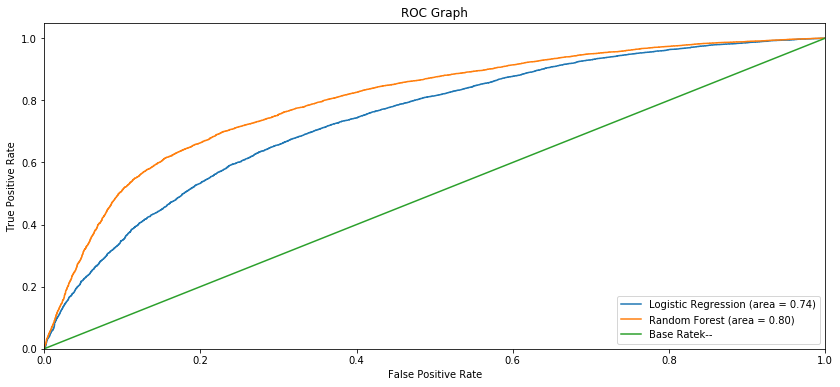

In [37]:
# Create ROC Graph
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, log_opt.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_opt.predict_proba(X_test)[:,1])
plt.figure(figsize=(14, 6))

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_opt_roc_auc)
# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

> As shown above, the fine-tuned Random Forest Classifier model showed a higher AUC score compared to the Logistic Regression. <br>

## Concluding Remarks

As the hospital generates more data on its patients, the algorithm can be re-trained using the additional data and theoritically should generate more accurate predictions to identify **high-risk patients**.